In [1]:
# warning not alarm!!

import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='malgun gothic')

In [7]:
data = pd.read_csv("D:/JDY_folder/jupyter_ws/240605/공공보건의료기관현황.csv",index_col=0, encoding='CP949', engine="python")
data.head()

,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN


In [8]:
addr = pd.DataFrame(data['주소'].apply(lambda v: v.split()[:2]).tolist(), columns=('시도','군구'))
addr

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시
...,...,...
222,충청북도,제천시
223,충청북도,충주시
224,충청북도,충주시
225,충청북도,영동군


In [ ]:
# def extract_location_info(v):
#     return v.split()[:2]

# addr = pd.DataFrame(data['주소'].apply(extract_location_info).tolist(), columns=('시도', '군구'))

In [ ]:
#### 시도 이름 확인

In [9]:
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

In [10]:
addr['시도'].value_counts()

시도
경기도        31
강원도        20
경상북도       19
전라남도       19
서울특별시      16
경상남도       13
대전광역시      10
충청남도       10
전라북도       10
부산광역시       9
대구광역시       9
광주광역시       8
충청북도        8
인천광역시       7
경남          7
서울시         5
제주특별자치도     5
경북          3
창원시         2
충북          2
충남          2
전남          2
경기          2
전북          2
천안시         2
경산시         1
부산특별시       1
대전시         1
울산광역시       1
Name: count, dtype: int64

In [13]:
addr[addr['시도'] == '창원시']

,시도,군구
27,창원시,의창구
31,창원시,마산합포구3.15대로


In [16]:
addr.iloc[27] = ['경상남도','창원시']
addr.iloc[31] = ['경상남도','창원시']
addr.iloc[27]


시도    경상남도
군구     창원시
Name: 27, dtype: object

In [17]:
addr[addr['시도'] == '경산시']

,시도,군구
47,경산시,경안로


In [18]:
addr[addr['시도'] == '천안시']

,시도,군구
209,천안시,동남구
210,천안시,동남구


In [19]:
addr.iloc[47] = ['경상북도','경산시']
addr.iloc[209] = ['충청남도','천안시']
addr.iloc[210] = ['충청남도','천안시']

In [20]:
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경북', '인천광역시', '대구광역시',
       '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충북',
       '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시', '전북',
       '충청북도'], dtype=object)

In [21]:
addr[addr['시도'] == '경기']

,시도,군구
22,경기,안산시
172,경기,고양시


In [22]:
addr[addr['시도'] == '경남']

,시도,군구
24,경남,통영시
25,경남,사천시
26,경남,사천시
28,경남,김해시
77,경남,양산시
78,경남,양산시
115,경남,창원시


In [23]:
## 시도 이름을 표준 이름으로 수정

addr_aliases = {'경기':'경기도', '경남':'경상남도', '경북':'경상북도', '충북':'충청북도', '서울시':'서울특별시', '부산특별시':'부산광역시', '대전시':'대전광역시', '충남':'충청남도', '전남':'전라남도', '전북':'전라북도'}

In [25]:
addr['시도']=addr['시도'].apply(lambda v:addr_aliases.get(v,v))
addr['시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '인천광역시', '대구광역시', '전라남도', '대전광역시',
       '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시', '충청남도',
       '울산광역시'], dtype=object)

In [ ]:
#### 군구 이름 확인하기

In [26]:
addr['군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '아란13길', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군',
       '강동구', '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군',
       '양구군', '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구',
       '노원구', '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군',
       '연제구', '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구',
       '성동구', '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군',
       '진도군', '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시',
       '남원시', '군산시', '고창군', '진안군', '제주시', '서귀포시', '천안시', '보령시', '서산시',
       '서천

In [28]:
addr['군구'].value_counts()

군구
유성구     7
창원시     7
춘천시     5
북구      5
남양주시    5
       ..
동해시     1
태백시     1
부평구     1
울릉군     1
단양군     1
Name: count, Length: 133, dtype: int64

In [29]:
addr[addr['군구'] == '아란13길']

,시도,군구
75,제주특별자치도,아란13길


In [30]:
addr.iloc[75] = ['제주특별자치도','제주시']

In [31]:
addr['군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '제주시', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군', '강동구',
       '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군', '양구군',
       '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구', '노원구',
       '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군', '연제구',
       '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구', '성동구',
       '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군', '진도군',
       '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시', '남원시',
       '군산시', '고창군', '진안군', '서귀포시', '천안시', '보령시', '서산시', '서천군', '홍성군',
     

In [33]:
addr['시도군구'] = addr['시도'] + ' ' + addr['군구']
addr
# addr['시도군구'] = addr.apply(lambda r: r['시도'] + ' ' + r['군구'], axis=1)

,시도,군구,시도군구
0,강원도,춘천시,강원도 춘천시
1,강원도,삼척시,강원도 삼척시
2,강원도,영월군,강원도 영월군
3,강원도,원주시,강원도 원주시
4,강원도,강릉시,강원도 강릉시
...,...,...,...
222,충청북도,제천시,충청북도 제천시
223,충청북도,충주시,충청북도 충주시
224,충청북도,충주시,충청북도 충주시
225,충청북도,영동군,충청북도 영동군


In [ ]:
#### 의료기관수

In [34]:
addr['count'] = 0
addr

,시도,군구,시도군구,count
0,강원도,춘천시,강원도 춘천시,0
1,강원도,삼척시,강원도 삼척시,0
2,강원도,영월군,강원도 영월군,0
3,강원도,원주시,강원도 원주시,0
4,강원도,강릉시,강원도 강릉시,0
...,...,...,...,...
222,충청북도,제천시,충청북도 제천시,0
223,충청북도,충주시,충청북도 충주시,0
224,충청북도,충주시,충청북도 충주시,0
225,충청북도,영동군,충청북도 영동군,0


In [35]:
addr_group = pd.DataFrame(addr.groupby(['시도','군구','시도군구'], as_index=False).count())
addr_group.head()

,시도,군구,시도군구,count
0,강원도,강릉시,강원도 강릉시,4
1,강원도,동해시,강원도 동해시,1
2,강원도,삼척시,강원도 삼척시,1
3,강원도,속초시,강원도 속초시,1
4,강원도,양구군,강원도 양구군,1


In [36]:
addr_group.tail()

,시도,군구,시도군구,count
135,충청북도,영동군,충청북도 영동군,1
136,충청북도,제천시,충청북도 제천시,1
137,충청북도,청원군,충청북도 청원군,1
138,충청북도,청주시,충청북도 청주시,4
139,충청북도,충주시,충청북도 충주시,2


In [ ]:
## 인구수와 의료기관수 비교

In [39]:
population = pd.read_excel("D:/JDY_folder/jupyter_ws/240605/행정구역_시군구_별__성별_인구수_2.xlsx")
population.head()

,행정구역(시군구)별(1),행정구역(시군구)별(2),총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51847509,25862863,25984646
1,서울특별시,소계,9733509,4745088,4988421
2,서울특별시,종로구,151215,73688,77527
3,서울특별시,중구,126201,61946,64255
4,서울특별시,용산구,229385,110701,118684


In [40]:
population = population.rename(columns={'행정구역(시군구)별(1)':'시도', '행정구역(시군구)별(2)':'군구'})
population

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51847509,25862863,25984646
1,서울특별시,소계,9733509,4745088,4988421
2,서울특별시,종로구,151215,73688,77527
3,서울특별시,중구,126201,61946,64255
4,서울특별시,용산구,229385,110701,118684
...,...,...,...,...,...
274,경상남도,거창군,62049,30275,31774
275,경상남도,합천군,45054,21590,23464
276,제주특별자치도,소계,670749,337231,333518
277,제주특별자치도,제주시,489202,245389,243813


In [43]:
for element in range(0, len(population)):
    population['군구'][element] = population['군구'][element].strip()

In [44]:
population['시도군구'] = population.apply(lambda r: r['시도'] + ' ' + r['군구'], axis=1)
population

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
0,전국,소계,51847509,25862863,25984646,전국 소계
1,서울특별시,소계,9733509,4745088,4988421,서울특별시 소계
2,서울특별시,종로구,151215,73688,77527,서울특별시 종로구
3,서울특별시,중구,126201,61946,64255,서울특별시 중구
4,서울특별시,용산구,229385,110701,118684,서울특별시 용산구
...,...,...,...,...,...,...
274,경상남도,거창군,62049,30275,31774,경상남도 거창군
275,경상남도,합천군,45054,21590,23464,경상남도 합천군
276,제주특별자치도,소계,670749,337231,333518,제주특별자치도 소계
277,제주특별자치도,제주시,489202,245389,243813,제주특별자치도 제주시


In [46]:
population = population[population.군구 != '소계']
population

# population =population.drop(population[population.군구 == '소계'].index)

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
2,서울특별시,종로구,151215,73688,77527,서울특별시 종로구
3,서울특별시,중구,126201,61946,64255,서울특별시 중구
4,서울특별시,용산구,229385,110701,118684,서울특별시 용산구
5,서울특별시,성동구,300410,147020,153390,서울특별시 성동구
6,서울특별시,광진구,351263,170164,181099,서울특별시 광진구
...,...,...,...,...,...,...
273,경상남도,함양군,39555,19058,20497,경상남도 함양군
274,경상남도,거창군,62049,30275,31774,경상남도 거창군
275,경상남도,합천군,45054,21590,23464,경상남도 합천군
277,제주특별자치도,제주시,489202,245389,243813,제주특별자치도 제주시


In [ ]:
## 두 개의 데이터프레임 합치기

In [48]:
addr_group = addr_group.set_index('시도군구')
addr_group

,시도,군구,count
시도군구,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1
...,...,...,...
충청북도 영동군,충청북도,영동군,1
충청북도 제천시,충청북도,제천시,1
충청북도 청원군,충청북도,청원군,1


In [47]:
population = population.set_index('시도군구')
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,151215,73688,77527
서울특별시 중구,서울특별시,중구,126201,61946,64255
서울특별시 용산구,서울특별시,용산구,229385,110701,118684
서울특별시 성동구,서울특별시,성동구,300410,147020,153390
서울특별시 광진구,서울특별시,광진구,351263,170164,181099


In [49]:
addr_population_merge = pd.merge(addr_group, population, how='inner', left_index=True, right_index=True)
addr_population_merge

,시도_x,군구_x,count,시도_y,군구_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,,,,
강원도 강릉시,강원도,강릉시,4,강원도,강릉시,213328,105775,107553
강원도 동해시,강원도,동해시,1,강원도,동해시,90417,45782,44635
강원도 삼척시,강원도,삼척시,1,강원도,삼척시,66806,33811,32995
강원도 속초시,강원도,속초시,1,강원도,속초시,81840,40470,41370
강원도 양구군,강원도,양구군,1,강원도,양구군,22526,11937,10589
...,...,...,...,...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,충청북도,단양군,29664,15023,14641
충청북도 영동군,충청북도,영동군,1,충청북도,영동군,48523,24060,24463
충청북도 제천시,충청북도,제천시,1,충청북도,제천시,134359,67326,67033


In [51]:
local_MC_Population = addr_population_merge[['시도_x','군구_x','count','총인구수 (명)']]
local_MC_Population.head()

,시도_x,군구_x,count,총인구수 (명)
시도군구,,,,
강원도 강릉시,강원도,강릉시,4,213328
강원도 동해시,강원도,동해시,1,90417
강원도 삼척시,강원도,삼척시,1,66806
강원도 속초시,강원도,속초시,1,81840
강원도 양구군,강원도,양구군,1,22526


In [52]:
local_MC_Population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 강원도 강릉시 to 충청북도 충주시
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시도_x      138 non-null    object
 1   군구_x      138 non-null    object
 2   count     138 non-null    int64 
 3   총인구수 (명)  138 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 5.4+ KB


In [53]:
# local_MC_Population.columns = local_MC_Population['시도','군구','count','인구수']

local_MC_Population = local_MC_Population.rename(columns = {'시도_x':'시도','군구_x':'군구','총인구수 (명)':'인구수'})
local_MC_Population.head()

,시도,군구,count,인구수
시도군구,,,,
강원도 강릉시,강원도,강릉시,4,213328
강원도 동해시,강원도,동해시,1,90417
강원도 삼척시,강원도,삼척시,1,66806
강원도 속초시,강원도,속초시,1,81840
강원도 양구군,강원도,양구군,1,22526


In [ ]:
#### 인구대비 의료기관수 비율

In [54]:
MC_count = local_MC_Population['count']
local_MC_Population['MC_ratio'] = MC_count.div(local_MC_Population['인구수'],axis=0)*100000
local_MC_Population.head()

,시도,군구,count,인구수,MC_ratio
시도군구,,,,,
강원도 강릉시,강원도,강릉시,4,213328,1.875047
강원도 동해시,강원도,동해시,1,90417,1.105987
강원도 삼척시,강원도,삼척시,1,66806,1.496872
강원도 속초시,강원도,속초시,1,81840,1.221896
강원도 양구군,강원도,양구군,1,22526,4.439315


In [63]:
local_MC_Population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 강원도 강릉시 to 충청북도 충주시
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시도        138 non-null    object 
 1   군구        138 non-null    object 
 2   count     138 non-null    int64  
 3   인구수       138 non-null    int64  
 4   MC_ratio  138 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 10.5+ KB


In [ ]:
#### 시각화

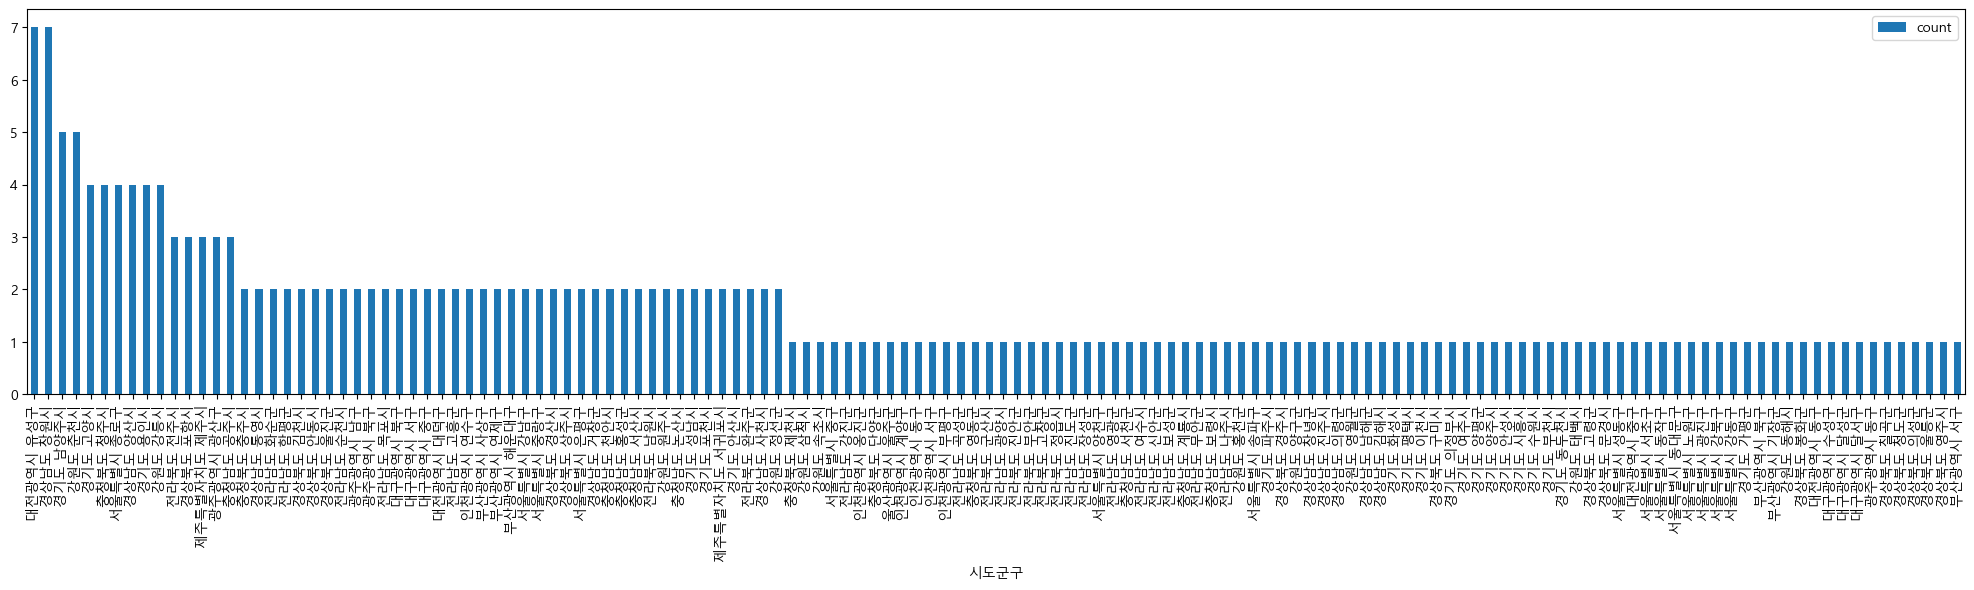

In [60]:
MC_ratio = local_MC_Population[['count']]
MC_ratio = MC_ratio.sort_values('count', ascending = False)
plt.rcParams['figure.figsize'] = (25,5)
MC_ratio.plot(kind='bar', rot=90)
plt.show()

In [58]:
# MC_ratio = local_MC_Population['count']
# print(type(MC_ratio))

<class 'pandas.core.series.Series'>


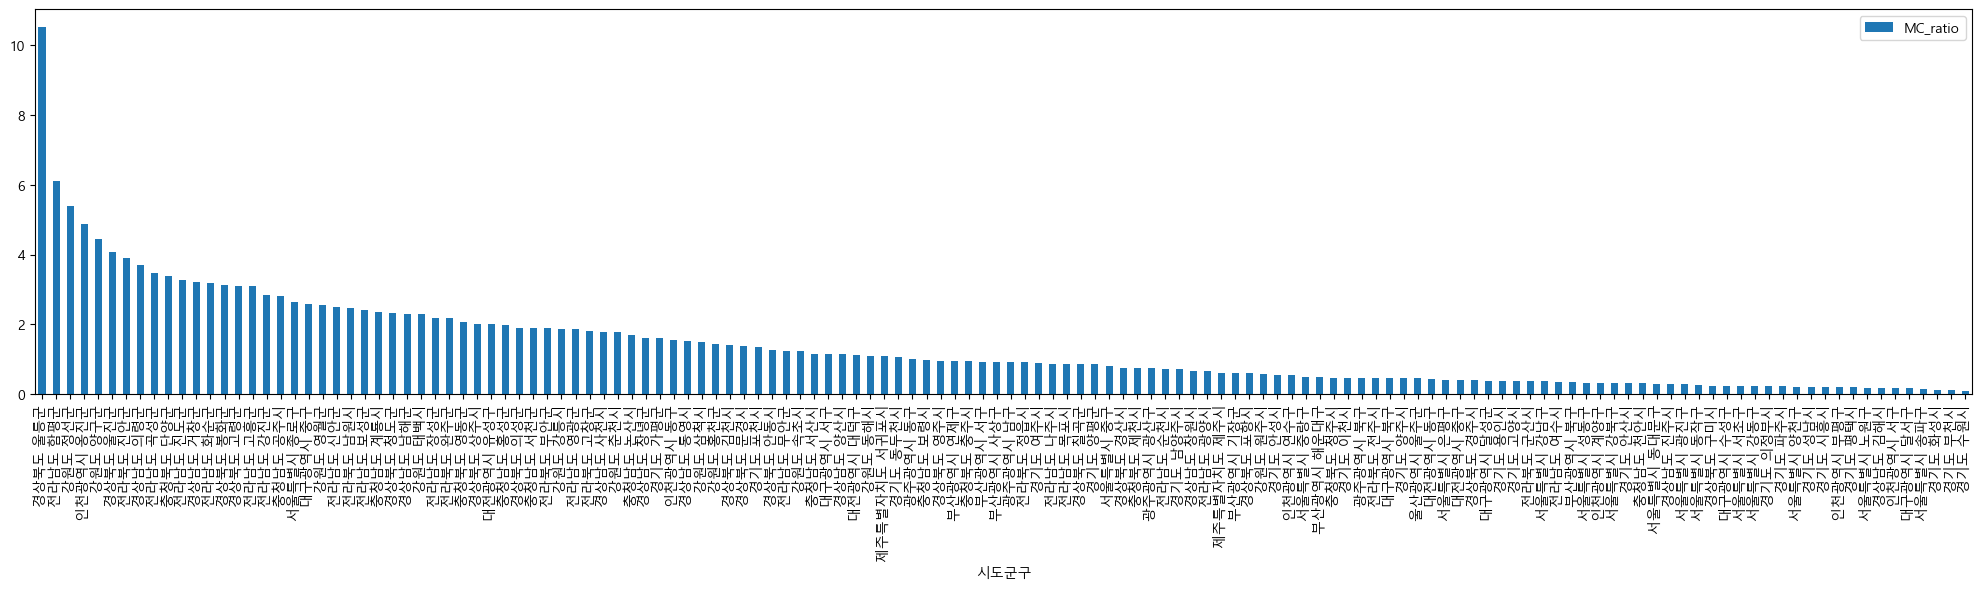

In [59]:
MC_ratio = local_MC_Population[['MC_ratio']]
MC_ratio = MC_ratio.sort_values('MC_ratio', ascending = False)
plt.rcParams['figure.figsize'] = (25,5)
MC_ratio.plot(kind='bar', rot=90)
plt.show()

In [ ]:
#### 블록맵

In [61]:
data_draw_korea = pd.read_csv("D:/JDY_folder/jupyter_ws/240605/data_draw_korea-002.csv",index_col=0, encoding='utf-8', engine="python")
data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


In [62]:
data_draw_korea.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, 0 to 228
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   인구수        229 non-null    int64  
 1   shortName  229 non-null    object 
 2   x          229 non-null    int64  
 3   y          229 non-null    int64  
 4   면적         229 non-null    float64
 5   광역시도       229 non-null    object 
 6   행정구역       229 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 14.3+ KB


In [64]:
data_draw_korea['시도군구'] = data_draw_korea['광역시도'] + ' ' + data_draw_korea['행정구역']
data_draw_korea

,인구수,shortName,x,y,면적,광역시도,행정구역,시도군구
0,202520,강릉,11,4,1040.07,강원도,강릉시,강원도 강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군,강원도 고성군
2,86747,동해,11,5,180.01,강원도,동해시,강원도 동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시,강원도 삼척시
4,76733,속초,9,1,105.25,강원도,속초시,강원도 속초시
...,...,...,...,...,...,...,...,...
224,127462,제천,8,10,882.47,충청북도,제천시,충청북도 제천시
225,34480,증평,6,11,81.84,충청북도,증평군,충청북도 증평군
226,62809,진천,5,11,406.08,충청북도,진천군,충청북도 진천군
227,790216,청주,6,12,932.51,충청북도,청주시,충청북도 청주시


In [65]:
data_draw_korea = data_draw_korea.set_index('시도군구')
data_draw_korea

,인구수,shortName,x,y,면적,광역시도,행정구역
시도군구,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시
...,...,...,...,...,...,...,...
충청북도 제천시,127462,제천,8,10,882.47,충청북도,제천시
충청북도 증평군,34480,증평,6,11,81.84,충청북도,증평군
충청북도 진천군,62809,진천,5,11,406.08,충청북도,진천군


In [66]:
data_draw_korea_MC_Population_all = pd.merge(data_draw_korea, local_MC_Population, how='outer', left_index=True, right_index=True)
data_draw_korea_MC_Population_all

,인구수_x,shortName,x,y,면적,광역시도,행정구역,시도,군구,count,인구수_y,MC_ratio
시도군구,,,,,,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시,강원도,강릉시,4.0,213328.0,1.875047
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군,NaN,NaN,NaN,NaN,NaN
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시,강원도,동해시,1.0,90417.0,1.105987
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시,강원도,삼척시,1.0,66806.0,1.496872
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시,강원도,속초시,1.0,81840.0,1.221896
...,...,...,...,...,...,...,...,...,...,...,...,...
충청북도 제천시,127462,제천,8,10,882.47,충청북도,제천시,충청북도,제천시,1.0,134359.0,0.744275
충청북도 증평군,34480,증평,6,11,81.84,충청북도,증평군,NaN,NaN,NaN,NaN,NaN
충청북도 진천군,62809,진천,5,11,406.08,충청북도,진천군,NaN,NaN,NaN,NaN,NaN


In [ ]:
#### 경계좌표값: y,x로 표현되어 있음 --> x, y로 변경 필요

In [68]:
#### 경계좌표값: y,x로 표현되어 있음 --> x, y로 변경 필요

BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)],
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], 
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], 
    [(9, 12), (9, 10), (8, 10)],
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)],
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], 
    [(14, 4), (15, 4), (15, 6)], 
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], 
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)],
    [(15, 11), (16, 11), (16, 13)], 
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], 
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], 
    [(18, 5), (20, 5), (20, 6)], 
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], 
]

In [69]:
def draw_blockMap(blockedMap, targetData, title, color ):
    
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) # * 0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)   ## np.isnan 함수를 사용하여 mapdata에서 NaN 값을 찾아, 마스크처리

    plt.figure(figsize=(8, 13))
    plt.title(title)
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=color, edgecolor='#aaaaaa', linewidth=0.5)
    ## → 마스킹된 NaN값은 색상이 없고, 컬러맵의 가장 낮은 값과 가장 높은 값 설정

    for idx, row in blockedMap.iterrows():
            annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
            ## → targetData의 값이 whitelabelmin보다 크면 annocolor를 'white'로, 그렇지 않으면 'black'으로 
    
            # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
            if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'):
                dispname = '{}\n{}'.format(row['광역시도'][:2], row['행정구역'][:-1])
                if len(row['행정구역']) <= 2:
                    dispname += row['행정구역'][-1]
            else:
                dispname = row['행정구역'][:-1]
    
    
            # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
            if len(dispname.splitlines()[-1]) >= 3:
                fontsize, linespacing = 9.5, 1.5
            else:
                fontsize, linespacing = 11, 1.2
    
            plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                         fontsize=fontsize, ha='center', va='center', color=annocolor,
                         linespacing=linespacing)
        
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)  ## path에 있는 각 좌표를 ys와 xs에 분리하여 저장
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()  ## y축의 방향을 뒤집기 (아래쪽으로 +값)
    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    
    plt.savefig('blockMap_' + targetData + '.png')
                      
    
    plt.show()


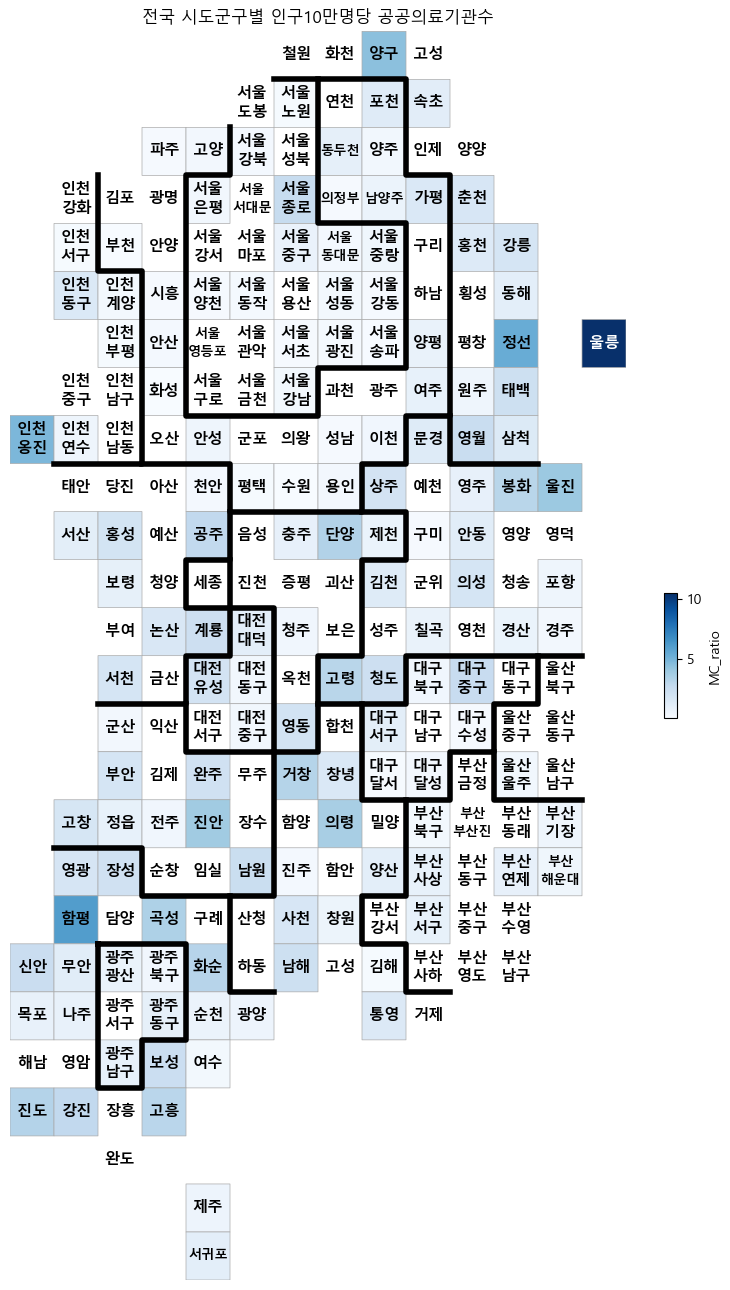

In [71]:
draw_blockMap(data_draw_korea_MC_Population_all, 'MC_ratio', title='전국 시도군구별 인구10만명당 공공의료기관수', color='Blues' )

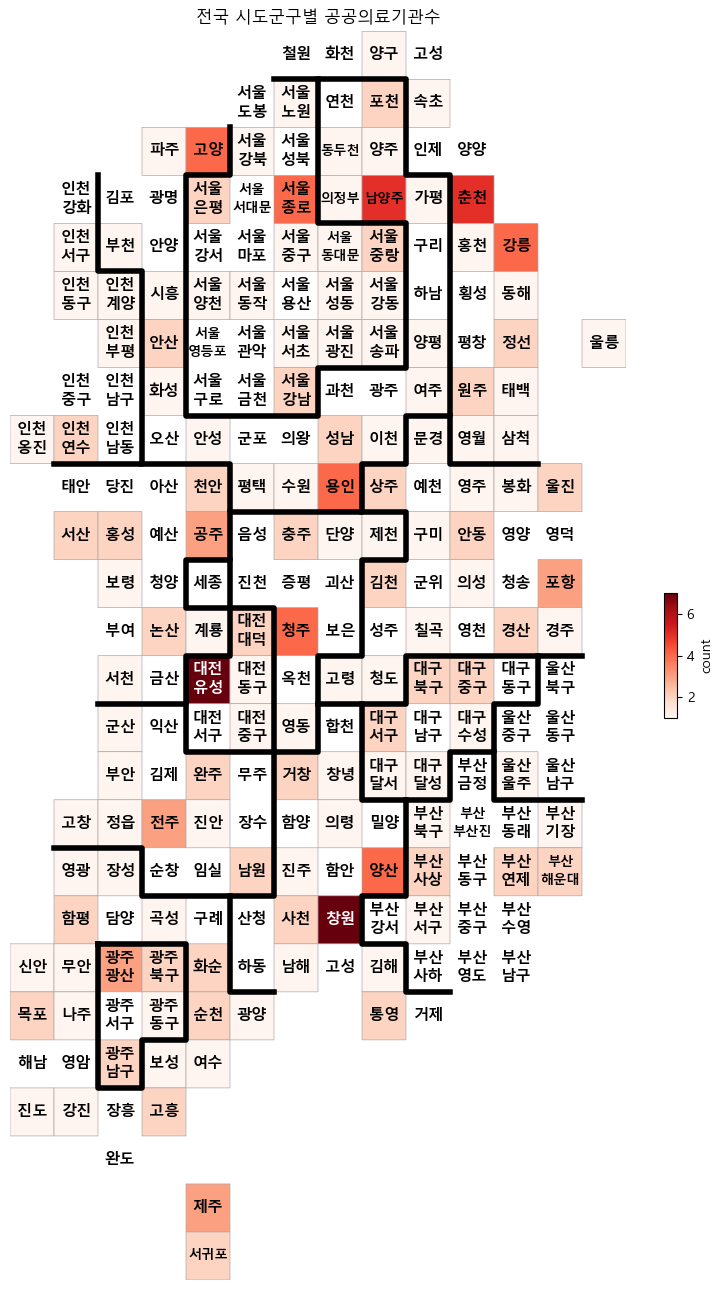

In [72]:
draw_blockMap(data_draw_korea_MC_Population_all, 'count', title='전국 시도군구별 공공의료기관수', color='Reds' )